In [ ]:
Attribute information For bank dataset
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical:
"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","selfemployed","
retired","technician","services")
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means
divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")
8. Missing Attribute Values: None
                       
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [ ]:
Data Preprocessing

In [90]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [91]:
#Load the data set
bank = pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# EDA

In [92]:
bank.shape

(45211, 17)

In [93]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [94]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [95]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [96]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [97]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
#No Duplicates Found

In [ ]:
# Correlatinal Analysis

In [98]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [99]:
# Removing NA values in data set
bank1 = bank.dropna()       # No NA in given dataset
bank1.shape

(45211, 17)

In [100]:
bank.shape

(45211, 17)

In [101]:
#drop marital and contact columns
bank.drop(['marital'],axis=1, inplace=True)
bank.drop(['contact'],axis=1, inplace=True)
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [102]:
bank.shape

(45211, 15)

In [103]:
bank[['default','housing','loan']]=bank[['default','housing','loan']].replace(["yes","no"],["1","0"])
bank['month']=bank['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
bank['job']=bank['job'].replace(['unknown'],['other'])

bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,no
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,no
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,no


In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank['job']=le.fit_transform(bank['job'])
bank['education']=le.fit_transform(bank['education'])
bank['poutcome']=le.fit_transform(bank['poutcome'])

In [105]:
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
bank.tail(10)

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
45201,53,4,2,0,583,0,0,17,11,226,1,184,4,2,yes,1
45202,34,0,1,0,557,0,0,17,11,224,1,-1,0,3,yes,1
45203,23,9,2,0,113,0,0,17,11,266,1,-1,0,3,yes,1
45204,73,6,1,0,2850,0,0,17,11,300,1,40,8,0,yes,1
45205,25,10,1,0,505,0,1,17,11,386,2,-1,0,3,yes,1
45206,51,10,2,0,825,0,0,17,11,977,3,-1,0,3,yes,1
45207,71,6,0,0,1729,0,0,17,11,456,2,-1,0,3,yes,1
45208,72,6,1,0,5715,0,0,17,11,1127,5,184,3,2,yes,1
45209,57,1,1,0,668,0,0,17,11,508,4,-1,0,3,no,0
45210,37,2,1,0,2971,0,0,17,11,361,2,188,11,1,no,0


In [106]:
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,no,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,no,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,no,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,no,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,no,0


In [107]:
# Dividing our data into input and output variables 
feature=['age','balance','duration','campaign']
target_output=['outcome']
X = bank[feature]
Y = bank[target_output]

In [108]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [109]:
classifier.coef_ #coefficients of features

array([[ 7.69721553e-03,  3.72191064e-05,  3.54908898e-03,
        -1.39828305e-01]])

In [132]:
classifier.predict_proba(X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [133]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [134]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [135]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [ ]:
#Calculate Accuraccy
# Accuracy = TP+TN/ TP+FP+TN+FN

In [136]:
((39342+854)/(39342+580+4435+854))*100   #80% Model accuracy

88.90756674260689

In [137]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,y_pred))

0.8890756674260689


In [138]:
y_pred = classifier.predict(X)
print(accuracy_score(Y,y_pred))

0.8890756674260689


In [139]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

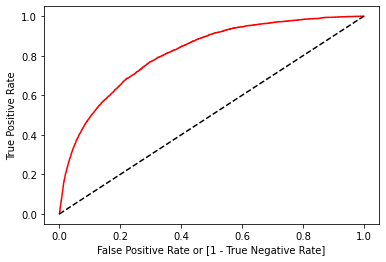

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')